In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import glob, operator, time, itertools, gzip, json, requests, datetime, os, struct
import pandas as pd
from scipy.stats import pearsonr
from collections import Counter
from multiprocessing import Pool
from __future__ import division


In [2]:
def new_fig(figsize=(8.9, 5)):
    plt.close()
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111)
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)    
    ax1.yaxis.grid(linestyle='--')
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for line in ax1.get_xticklines() + ax1.get_yticklines():
        line.set_markersize(8)
    return ax1

In [4]:
def perf_vis(ds2perf, theway=None):
    nfile = np.sort(ds2perf.keys())[::-1][:-1]
    nps   = np.sort(ds2perf[nfile[0]].np.unique())[:-2]
    _perf = []
    for nf in nfile:
        _nf_perf = []
        for _np in nps:
            _np_log = ds2perf[nf][ds2perf[nf].np == _np]
            _nf_perf.append(1e-9 * _np_log.nbyte.sum() / (_np_log.telapse.max()*1e-6))
        _perf.append(_nf_perf)
    
    _perf = np.array(_perf)
    ax = new_fig(figsize=(10, 10))
    plt.imshow(_perf, interpolation='none', vmin=10, vmax=1)
    plt.yticks(range(_perf.shape[0]), ["%dK" % (_nf/1000) for _nf in nfile])
    plt.xticks(range(_perf.shape[1]), ["%d"  % (_np) for _np in nps])
    plt.ylabel('# Files', fontsize=20)
    plt.xlabel('CC', fontsize=20)
    cbar = plt.colorbar()
    cbar.set_label('Throughput (GB/s)', fontsize=20)
    if theway is not None: plt.title(theway, fontsize=16)
    for i in range(_perf.shape[0]):
        for j in range(_perf.shape[1]):
            plt.text(j-.1, i, '%.1f' % _perf[i][j])
    plt.show()
    plt.close()
    return pd.DataFrame(_perf, index=nfile, columns=nps)

ds2perf_bysize = perf_vis(ds2log_bysize, theway='bysize')
ds2perf_bysizeost = perf_vis(ds2log_bysizeost, theway='bysizeost')
ds2perf_dyost = perf_vis(ds2log_dyost, theway='dyost')


NameError: name 'ds2log_bysize' is not defined

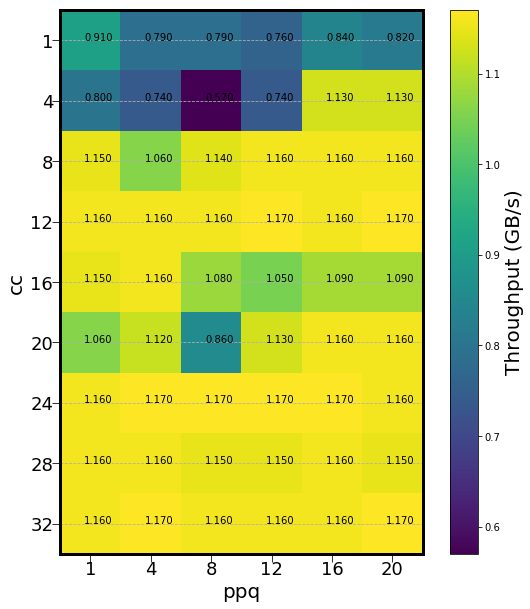

In [5]:
def cc_ppq_vis(fn):
    thro = [[] for i in range(9)]
    size = 100*(2**30)
    with open(fn, "r") as f:
        for rtt in [0]:
            f.readline()
            for cc in range(9):
                f.readline()
                for ppq in range(6):
                    f.readline()
                    thro[cc].append(float("%.2f" % (size / float(f.readline().rstrip('\n')) / 10**9)))
    return thro 
plt.close()
_thro = cc_ppq_vis("10.09-05.41.18-100G_rtt_cc_ppq.txt")
ccList = [1, 4, 8, 12, 16, 20, 24, 28, 32]
ppqList = [1, 4, 8, 12, 16, 20]
thro = np.array(_thro)
ax = new_fig(figsize=(10, 10))
plt.imshow(thro, interpolation='none')
plt.yticks(range(9), ccList)
plt.xticks(range(6), ppqList)
plt.ylabel('cc', fontsize=20)
plt.xlabel('ppq', fontsize=20)
cbar = plt.colorbar()
cbar.set_label('Throughput (GB/s)', fontsize=20)
for i in range(thro.shape[0]):
        for j in range(thro.shape[1]):
            plt.text(j-.1, i, '%.3f' % thro[i][j])
#plt.show()
#plt.close()